# ・Extract postcode area from postcard.

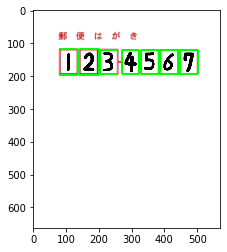

In [22]:
import cv2
import matplotlib.pyplot as plt

def detect_zipno(fname):
    
    img = cv2.imread(fname)
    
    h, w = img.shape[:2]
    
    img = img[0:h//2, w//3:]
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Smooth image. (画像を平滑化(ぼかし))
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    # Image binarization. (画像を2値化)
    im2 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]

    #! Contour extraction.
    #print(cv2.findContours, __doc__)
    cnts = cv2.findContours(im2,
                            cv2.RETR_LIST,
                            cv2.CHAIN_APPROX_SIMPLE)[0]

    result = []
    #! Draw the extracted frame.(輪郭抽出)
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)
        # Eliminate areas that are too large or too small.
        if not 50 < w < 70:
            continue
        result.append([x, y, w, h])
    result = sorted(result, key=lambda x: x[0])

    result2 = []
    lastx = -100
    #! Draw the extracted frame.(輪郭抽出)
    for x, y, w, h in result:
        if (x - lastx) < 10:
            continue
        result2.append([x, y, w, h])
        lastx = x

    for x, y, w, h in result2:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
    return result2, img

if __name__ == "__main__":
    
    cnts, img = detect_zipno("hagaki1.png")
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.savefig("detect-zip.png", dpi = 200)
    plt.show()